# **Testing the Auction module**

In [1]:
import sys
import numpy as np
from importlib import reload
sys.path.append("../")

import auction
reload(auction)

<module 'auction' from '../auction.py'>

## **Functionality testing**

### Small sample

In [2]:
starting_prices = np.random.normal(300, 15, 10)

def preference_function(current_prices):
    return np.argmin(current_prices)

In [3]:
auctions = [auction.Auctioneer(starting_prices[i], 10) for i in range(10)]
buyers = [auction.Buyer(auctions, 5000, preference_function) for i in range(10)]

In [4]:
result = auction.run_auctions(auctions, buyers)

In [5]:
result

[{'auction_index': 3, 'buyer_index': 0, 'price': 288.19484249432185},
 {'auction_index': 6, 'buyer_index': 3, 'price': 295.1345708337224},
 {'auction_index': 7, 'buyer_index': 1, 'price': 293.3901193554589},
 {'auction_index': 8, 'buyer_index': 2, 'price': 293.9645977642444},
 {'auction_index': 0, 'buyer_index': 5, 'price': 324.20861169585567},
 {'auction_index': 1, 'buyer_index': 7, 'price': 327.3585616624283},
 {'auction_index': 2, 'buyer_index': 6, 'price': 324.6185294370245},
 {'auction_index': 5, 'buyer_index': 9, 'price': 321.0911481540824},
 {'auction_index': 9, 'buyer_index': 4, 'price': 323.3523159401985},
 {'auction_index': 4, 'buyer_index': 8, 'price': 329.21913712993387}]

### Bigger sample

In [6]:
starting_prices = np.random.normal(300, 15, 400)
auctions = [auction.Auctioneer(starting_prices[i], 10) for i in range(200)]
buyers = [auction.Buyer(auctions, 5000, preference_function) for i in range(200)]

In [7]:
result = auction.run_auctions(auctions, buyers)

In [8]:
successful_buyers = []
for r in result:
    if r["buyer_index"] in successful_buyers: raise(ValueError)
    successful_buyers.append(r["buyer_index"])

Text(0, 0.5, 'occurance')

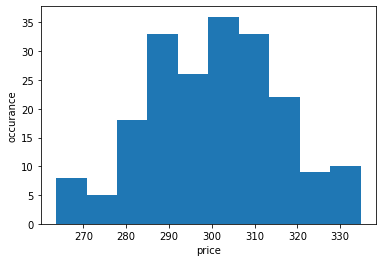

In [9]:
import matplotlib.pyplot as plt

prices = []
for r in result:
    prices.append(r["price"])
    
plt.hist(prices)
plt.xlabel("price")
plt.ylabel("occurance")

## **Asymmetric test cases**

### #buyers > #items

In [10]:
starting_prices = np.random.normal(300, 15, 30)
auctions = [auction.Auctioneer(starting_prices[i], 10) for i in range(30)]
buyers = [auction.Buyer(auctions, 5000, preference_function) for i in range(100)]

In [11]:
result = auction.run_auctions(auctions, buyers)

In [12]:
successful_buyers = []
for r in result:
    if r["buyer_index"] in successful_buyers: raise(ValueError)
    successful_buyers.append(r["buyer_index"])

Text(0, 0.5, 'occurance')

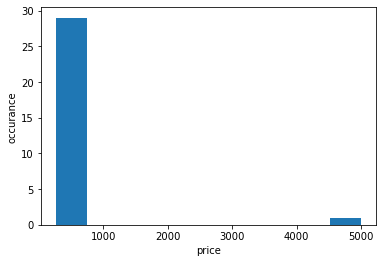

In [13]:
import matplotlib.pyplot as plt

prices = []
for r in result:
    prices.append(r["price"])
    
plt.hist(prices)
plt.xlabel("price")
plt.ylabel("occurance")

### #buyers < #items

In [14]:
starting_prices = np.random.normal(300, 15, 50)
auctions = [auction.Auctioneer(starting_prices[i], 10) for i in range(50)]
buyers = [auction.Buyer(auctions, 5000, preference_function) for i in range(30)]

In [15]:
result = auction.run_auctions(auctions, buyers)

In [16]:
result

[{'auction_index': 16, 'buyer_index': 5, 'price': 278.6778282282365},
 {'auction_index': 28, 'buyer_index': 6, 'price': 279.6402762602332},
 {'auction_index': 37, 'buyer_index': 3, 'price': 277.4387319052458},
 {'auction_index': 40, 'buyer_index': 4, 'price': 278.6089951129178},
 {'auction_index': 9, 'buyer_index': 2, 'price': 281.01349209807785},
 {'auction_index': 10, 'buyer_index': 7, 'price': 283.77689140437906},
 {'auction_index': 11, 'buyer_index': 0, 'price': 279.6802137171264},
 {'auction_index': 26, 'buyer_index': 1, 'price': 280.53736097412974},
 {'auction_index': 4, 'buyer_index': 8, 'price': 285.25350777208223},
 {'auction_index': 6, 'buyer_index': 10, 'price': 288.16378573769146},
 {'auction_index': 29, 'buyer_index': 11, 'price': 289.1787862884123},
 {'auction_index': 36, 'buyer_index': 9, 'price': 286.57912366235485},
 {'auction_index': 47, 'buyer_index': 12, 'price': 291.17499914784946},
 {'auction_index': 2, 'buyer_index': 14, 'price': 292.6400369532929},
 {'auction_in

Text(0, 0.5, 'occurance')

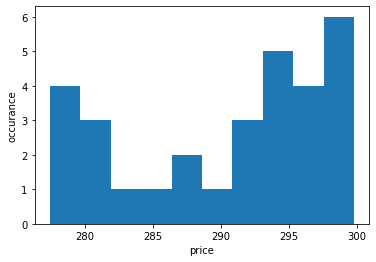

In [17]:
import matplotlib.pyplot as plt

prices = []
for r in result:
    prices.append(r["price"])
    
plt.hist(prices)
plt.xlabel("price")
plt.ylabel("occurance")